<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/fraud_detection_in_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/fraud_detection.csv')

In [2]:
df

,transaction_id,amount,merchant_type,device_type,label
0,1,46.93,travel,tablet,0
1,2,301.01,groceries,desktop,0
2,3,131.67,others,tablet,0
3,4,91.29,electronics,desktop,0
4,5,16.96,others,mobile,0
...,...,...,...,...,...
995,996,9.61,clothing,tablet,0
996,997,249.27,travel,mobile,0
997,998,14.71,others,mobile,0
998,999,300.05,travel,tablet,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   int64  
 1   amount          1000 non-null   float64
 2   merchant_type   1000 non-null   int64  
 3   device_type     1000 non-null   int64  
 4   label           1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [6]:
print(df['label'].unique())
print(df['device_type'].unique())
print(df['merchant_type'].unique())

[0 1]
['tablet' 'desktop' 'mobile']
['travel' 'groceries' 'others' 'electronics' 'clothing']


In [7]:
# For device_type
device_mapping = {
    'tablet': 0,
    'desktop': 1,
    'mobile': 2
}

# For merchant_type
merchant_mapping = {
    'travel': 0,
    'groceries': 1,
    'others': 2,
    'electronics': 3,
    'clothing': 4
}

df['device_type'] = df['device_type'].map(device_mapping)
df['merchant_type'] = df['merchant_type'].map(merchant_mapping)

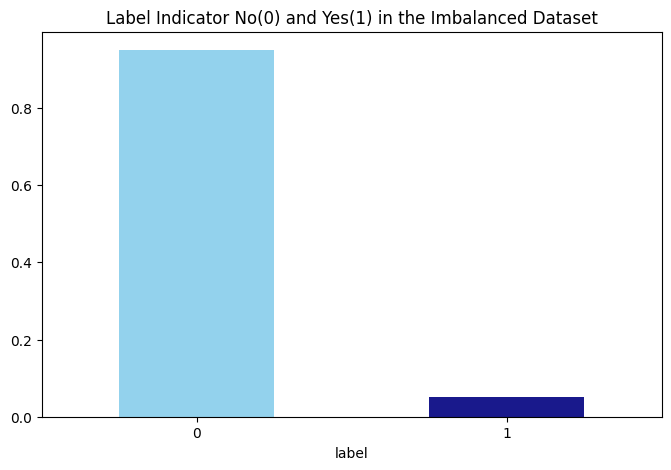

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.label.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Label Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

In [11]:
from sklearn.utils import resample

df_majority = df[df.label == 0]
df_minority = df[df.label == 1]

df_minority_upsampled = resample(
    df_minority,
    replace=True,               # sample with replacement
    n_samples=len(df_majority), # match number of majority class
    random_state=42             # reproducibility
)

df = pd.concat([df_majority, df_minority_upsampled])

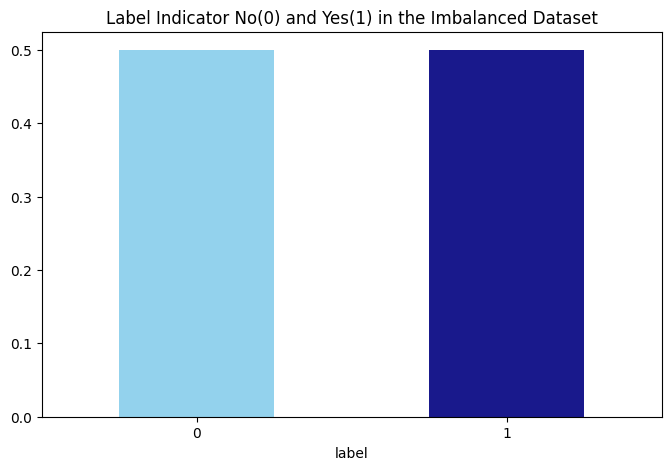

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.label.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Label Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

<Axes: >

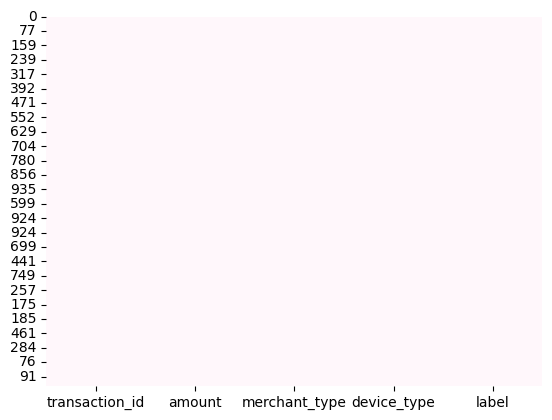

In [14]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu') #no missing values